In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

datafile = 'data/Zinser_SizeDist_calibrated-26-6.nc'

data = {}
with nc4.Dataset(datafile) as nc:
    for var in nc.variables:
        data[var] = nc.variables[var][:]

v_min = data['v_min']
delta_v = 1.0/data['delta_v_inv']
v = v_min * 2**(np.arange(data['m'])*delta_v)

def add_colorbar(ax, **cbarargs):
    axins_cbar = inset_axes(ax, width='3%', height='90%', loc=5, bbox_to_anchor=(0.05,0.0,1,1), bbox_transform=ax.transAxes)
    cb = mpl.colorbar.ColorbarBase(axins_cbar, orientation='vertical', **cbarargs)
    cb.solids.set_rasterized(True)

cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

## the old formulation

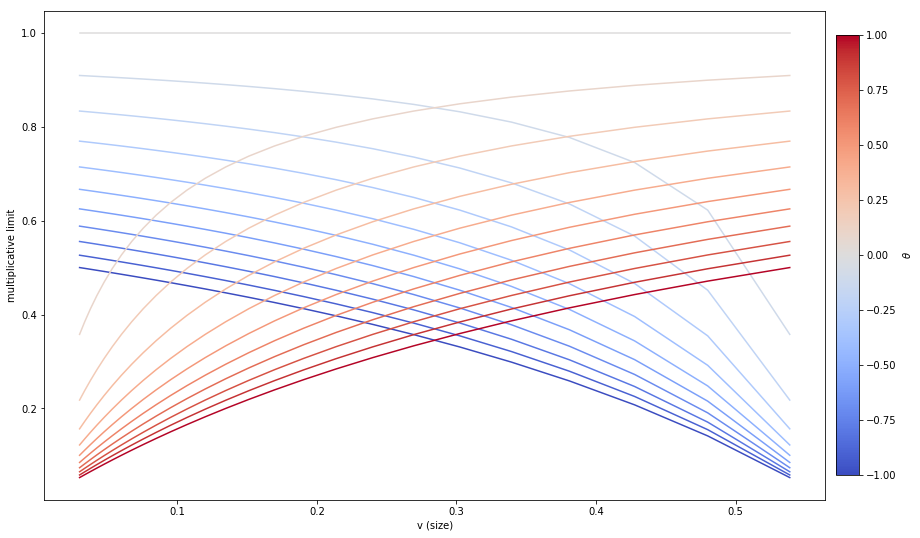

In [2]:
fig, ax = plt.subplots(figsize=(14,9))

for xi in np.linspace(-1.0,1.0,21):
    if xi > 0:
        tmp = v/v[-1]
        sizelim = tmp/(xi+tmp)
    else:
        tmp = 1.0 + (v_min-v)/v[-1]
        sizelim = tmp/(tmp-xi)
    ax.plot(v, sizelim, color=cmap(norm(xi)))
add_colorbar(ax, norm=norm, cmap=cmap, label='$\\theta$')
ax.set(xlabel='v (size)', ylabel='multiplicative limit')
None

## a "power law" formulation

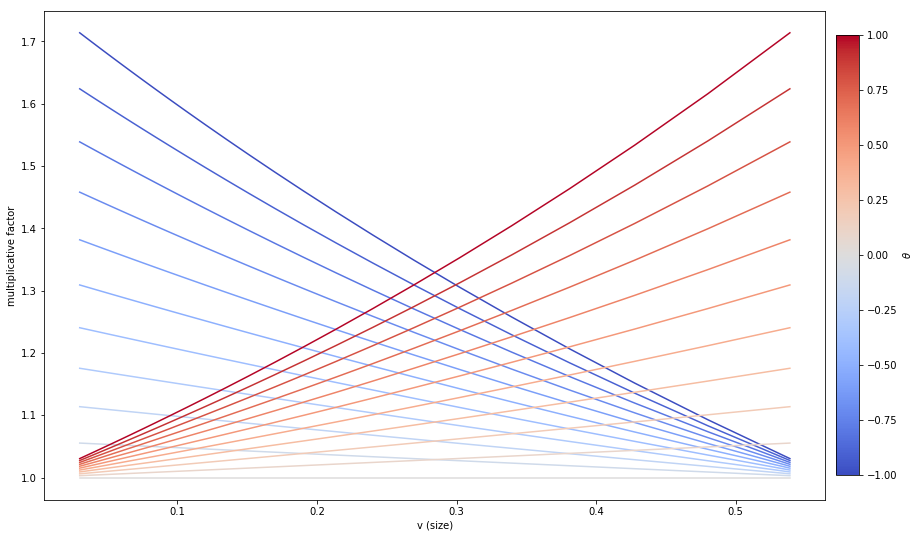

In [4]:
fig, ax = plt.subplots(figsize=(14,9))

for xi in np.linspace(-1.0,1.0,21):
    if xi > 0:
        sizelim = np.exp(xi*v)
    else:
        sizelim = np.exp(xi*(v-v[-1]-v[0]))
    ax.plot(v, sizelim, color=cmap(norm(xi)))
add_colorbar(ax, norm=norm, cmap=cmap, label='$\\theta$')
ax.set(xlabel='v (size)', ylabel='multiplicative factor')
None